In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_data_kaggle_df = pd.read_csv('../Cleaning/updated_covid_data_kaggle.csv')

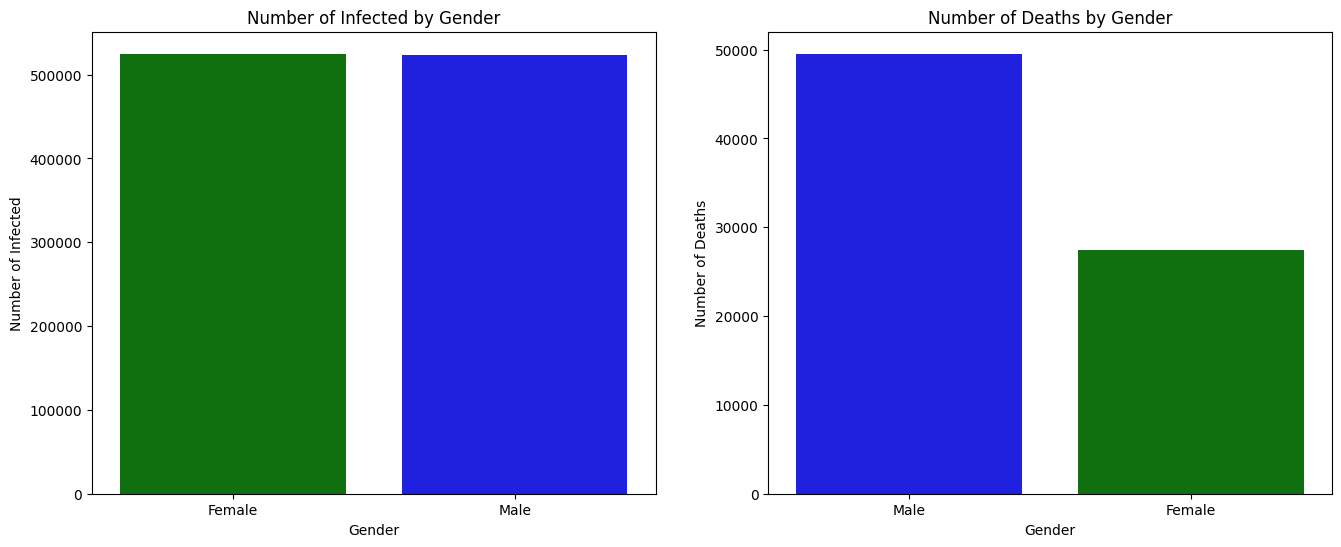

In [2]:
# Filter the DataFrame for rows where "Date_died" is not '-'
deaths_df = covid_data_kaggle_df[covid_data_kaggle_df['Date_died'] != '-']
death_counts = deaths_df['Sex'].value_counts()
infection_counts = covid_data_kaggle_df['Sex'].value_counts()
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for females and males
colors = {'Female': 'green', 'Male': 'blue'}

# Plot for number of infected males and females
sns.barplot(x=infection_counts.index, y=infection_counts.values, hue=infection_counts.index, palette=colors, ax=ax1)
ax1.set_title('Number of Infected by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Infected')

# Plot for number of deaths by gender
sns.barplot(x=death_counts.index, y=death_counts.values, hue=death_counts.index, palette=colors, ax=ax2)
ax2.set_title('Number of Deaths by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Deaths')

plt.show()

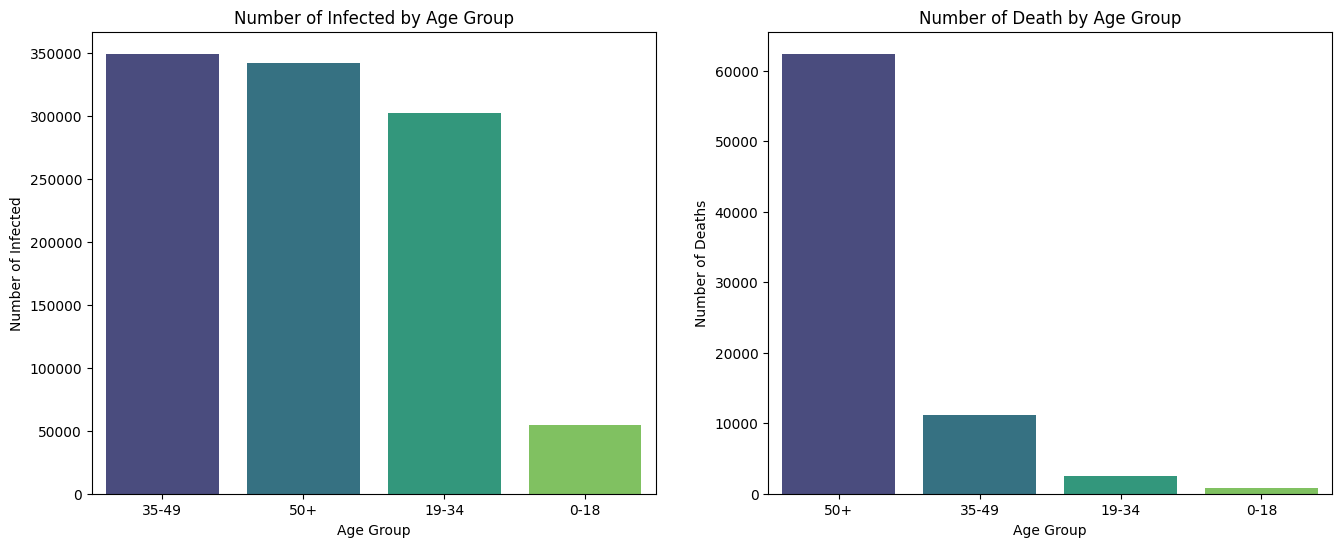

In [3]:
infection_counts_by_age_group = covid_data_kaggle_df['Age Group'].value_counts()
# Count the number of deaths per age group
death_counts_age_group = deaths_df['Age Group'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for number of infected males and females
sns.barplot(x=infection_counts_by_age_group.index, y=infection_counts_by_age_group.values, hue=infection_counts_by_age_group.index, palette='viridis', ax=ax1)
ax1.set_title('Number of Infected by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Infected')

# Plot for number of survivals by gender
sns.barplot(x=death_counts_age_group.index, y=death_counts_age_group.values, hue=death_counts_age_group.index, palette='viridis', ax=ax2)
ax2.set_title('Number of Death by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Number of Deaths')

plt.show()

Tobacco
No     69620
Yes     6592
-        725
Name: count, dtype: int64
7.8265618692565235
7.245207932888686


<Figure size 1000x600 with 0 Axes>

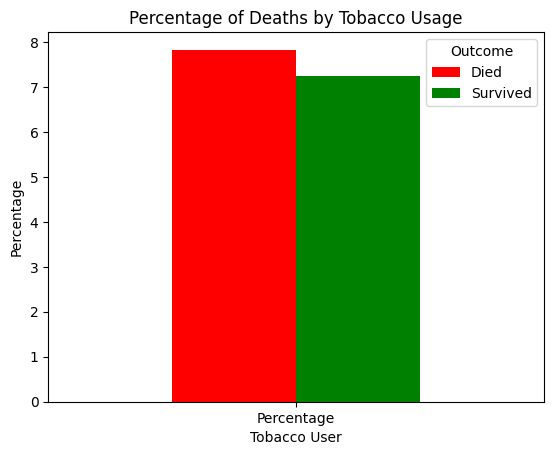

In [4]:
infection_counts_by_tobacco = covid_data_kaggle_df['Tobacco'].value_counts()
# Count the number of deaths among Tobacco users and non-Tobacco users
deaths_counts = deaths_df['Tobacco'].value_counts()
print(deaths_counts)
# Calculate the percentage of deaths among Tobacco users and non-Tobacco users
percentage_deaths_tobacco = (deaths_counts['Yes'] / infection_counts_by_tobacco['Yes']) * 100
percentage_survival_tobacco = (deaths_counts['No']/ infection_counts_by_tobacco['No']) * 100
print(percentage_deaths_tobacco)
print(percentage_survival_tobacco)

# Create a DataFrame for plotting with a proper index
plot_data = pd.DataFrame({
    'Tobacco User': percentage_deaths_tobacco,
    'Non-Tobacco User': percentage_survival_tobacco
}, index=['Percentage'])

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
plot_data.plot(kind='bar', color=['red', 'green'])
plt.title('Percentage of Deaths by Tobacco Usage')
plt.xlabel('Tobacco User')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['Died', 'Survived'])
plt.show()

C:\Users\arammos\AppData\Local\Temp\ipykernel_12316\1335585751.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Column', data=plot_data, palette='viridis')


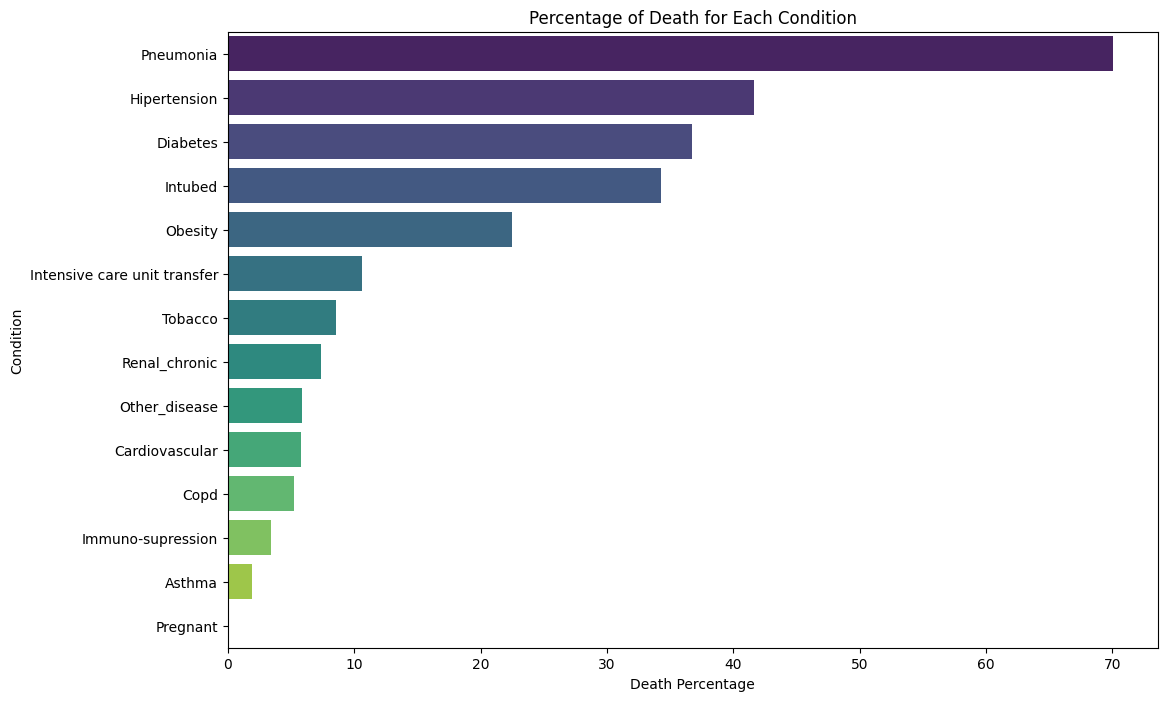

In [5]:
#Calculation of death percentage to detect the effect of each on incidence of death
total_deaths = covid_data_kaggle_df[covid_data_kaggle_df['Passed_away']=='Yes'].Passed_away.count()

percentage = []
columns=['Intubed', 'Pneumonia', 'Pregnant', 'Hipertension', 'Obesity', 'Cardiovascular', 'Renal_chronic', 'Tobacco', 'Other_disease', 'Copd', 'Diabetes', 'Asthma', 'Intensive care unit transfer', 'Immuno-supression']
for column in columns:
    percentage_per_column = covid_data_kaggle_df[(covid_data_kaggle_df['Passed_away']=='Yes') & (covid_data_kaggle_df[column]=='Yes')].Passed_away.count()/total_deaths * 100
    percentage.append(percentage_per_column)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Column': columns, 'Percentage': percentage})

# Sort the DataFrame by Percentage in descending order
plot_data = plot_data.sort_values(by='Percentage', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Column', data=plot_data, palette='viridis')
plt.title('Percentage of Death for Each Condition')
plt.xlabel('Death Percentage')
plt.ylabel('Condition')
plt.show()

In [53]:
owid_data_df_cleaned = pd.read_csv('../Cleaning/owid_data_cleaned.csv')
owid_data_df_cleaned = owid_data_df_cleaned.loc[:, ~owid_data_df_cleaned.columns.str.contains('^Unnamed')]
owid_data_df_cleaned.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-04-05        274.0      183.0   
1      AFG      Asia  Afghanistan 2020-04-12        521.0      247.0   
2      AFG      Asia  Afghanistan 2020-04-19        908.0      387.0   
3      AFG      Asia  Afghanistan 2020-04-26       1330.0      422.0   
4      AFG      Asia  Afghanistan 2020-05-03       2171.0      841.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0              39.143           5.0         3.0                0.714  ...   
1              74.429          15.0        10.0                2.143  ...   
2             129.571          30.0        15.0                4.286  ...   
3             189.857          43.0        13.0                6.143  ...   
4             309.143          64.0        21.0                9.143  ...   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                                    NaN                             NaN   
1                                    NaN                             NaN   
2                                    NaN                             NaN   
3                                    NaN                             NaN   
4                                    NaN                             NaN   

   new_people_vaccinated_smoothed_per_hundred  population_density  \
0                                         NaN              54.422   
1                                         NaN              54.422   
2                                         NaN              54.422   
3                                         NaN              54.422   
4                                         NaN              54.422   

   gdp_per_capita  extreme_poverty  diabetes_prevalence  \
0        1803.987              NaN                 9.59   
1        1803.987              NaN                 9.59   
2        1803.987              NaN                 9.59   
3        1803.987              NaN                 9.59   
4        1803.987              NaN                 9.59   

   handwashing_facilities  human_development_index  population  
0                  37.746                    0.511  41128772.0  
1                  37.746                    0.511  41128772.0  
2                  37.746                    0.511  41128772.0  
3                  37.746                    0.511  41128772.0  
4                  37.746                    0.511  41128772.0  

[5 rows x 40 columns]

In [54]:
# Set 'date' as the index
owid_data_df_cleaned.set_index('date', inplace=True)

# Fill NaN values with 0
owid_data_df_cleaned.fillna(0, inplace=True)


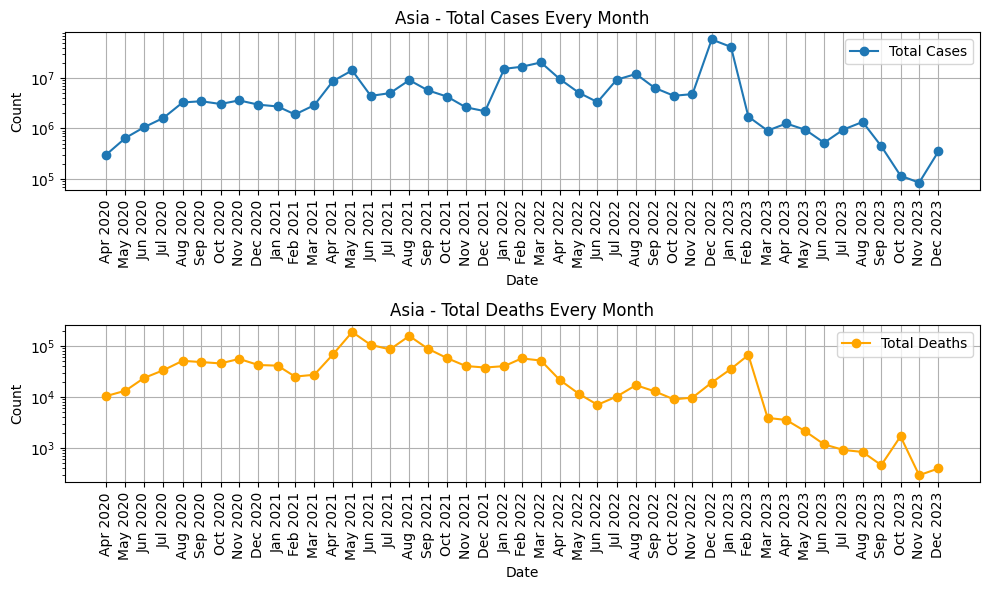

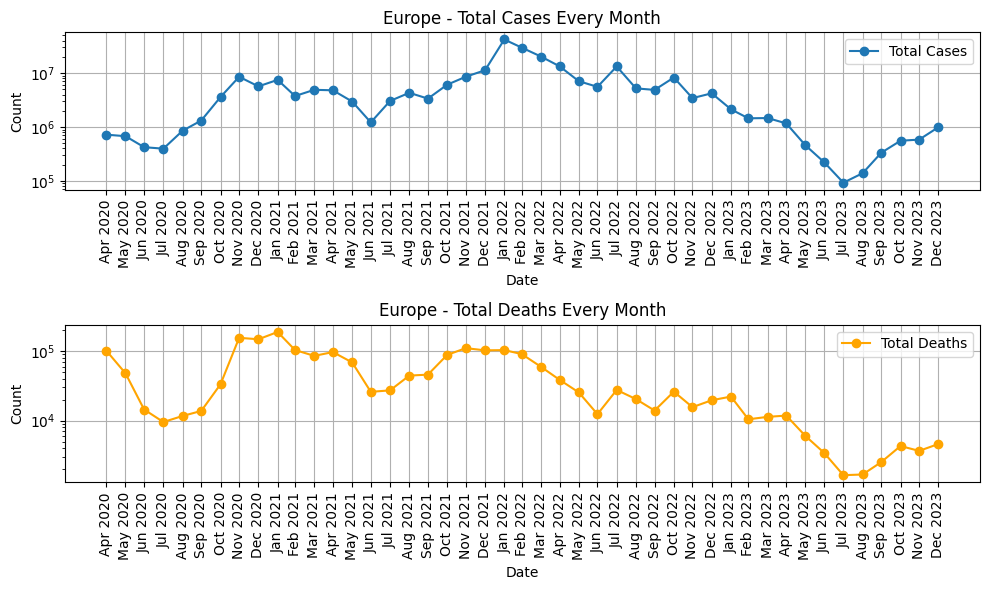

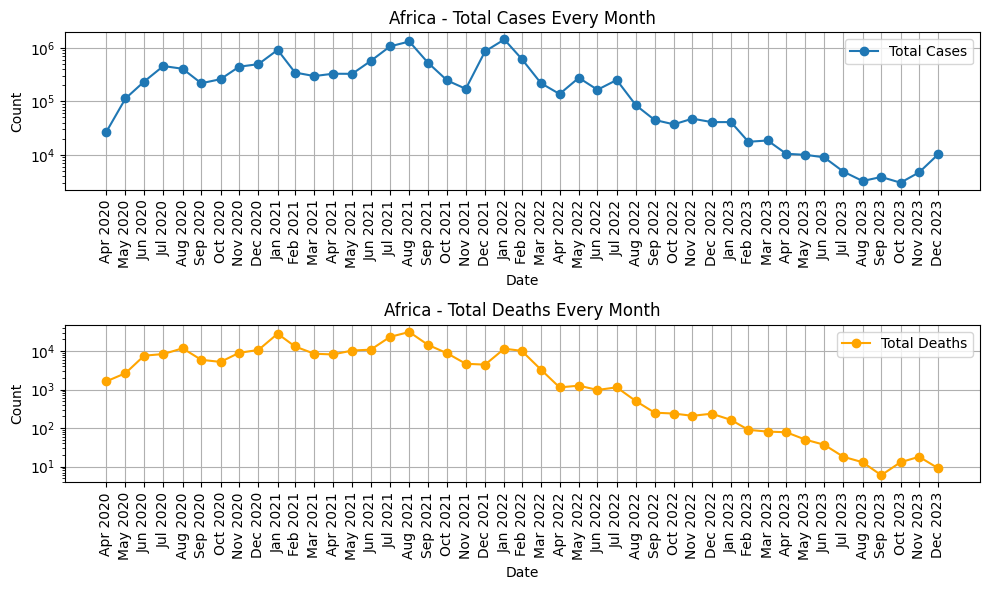

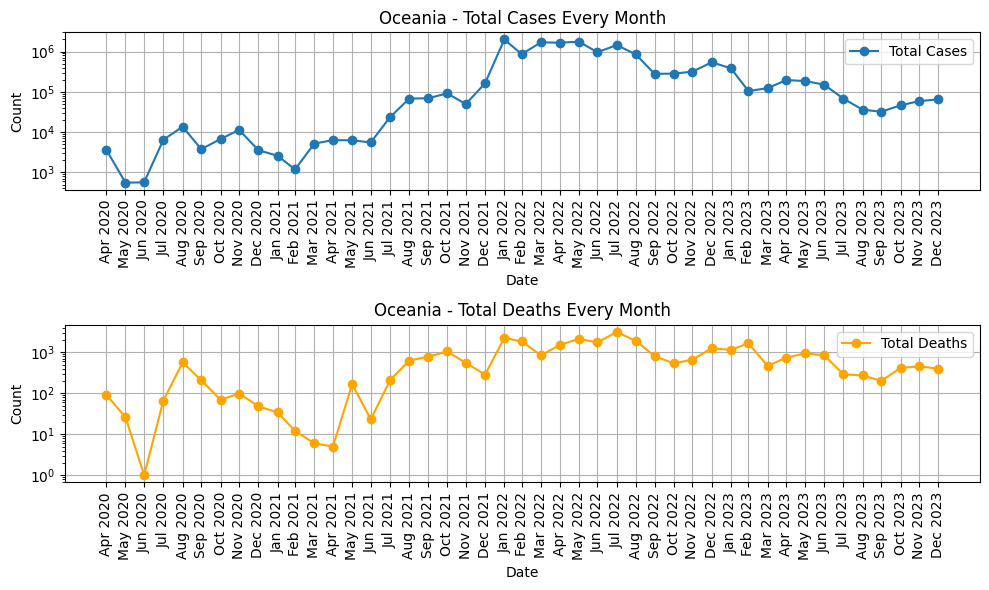

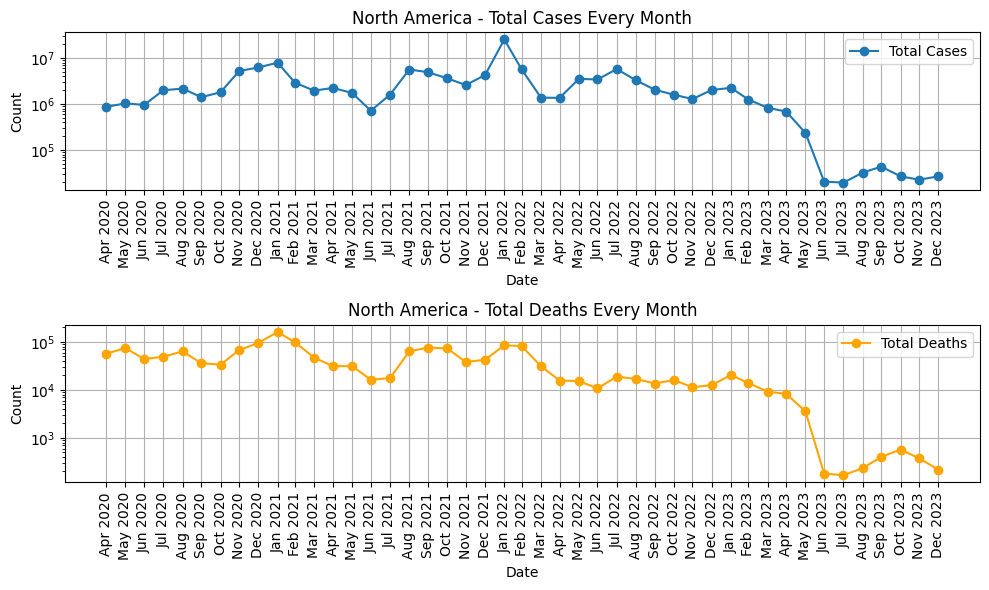

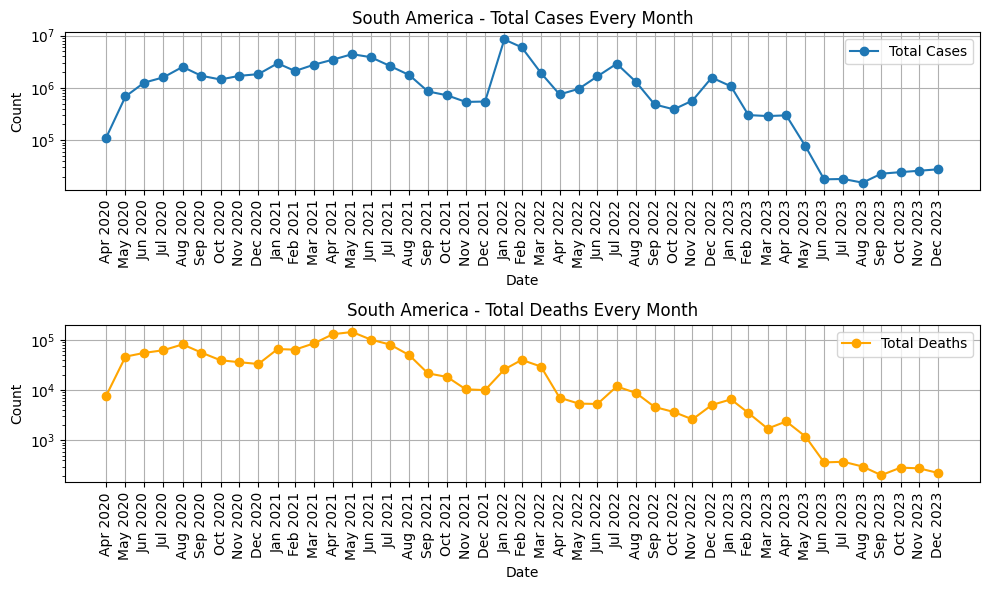

In [55]:
# Group by continent and resample the data every 3 months, summing only 'new_cases' and 'new_deaths'
grouped_df = owid_data_df_cleaned.groupby('continent').resample('M').agg({'new_cases': 'sum', 'new_deaths': 'sum'})

# Get unique continents
continents = owid_data_df_cleaned['continent'].unique()

# Create separate plots for total cases and total deaths for each continent with y-axis scaling
for continent in continents:
    plt.figure(figsize=(10, 6))
    # Plot total cases with logarithmic scaling
    plt.subplot(2, 1, 1)
    plt.plot(grouped_df.loc[continent].index, grouped_df.loc[continent]['new_cases'], label='Total Cases', marker='o')
    plt.yscale('log')  # Logarithmic scaling
    plt.title(f'{continent} - Total Cases Every Month')
    plt.xlabel('Date')
    plt.xticks(grouped_df.loc[continent].index, grouped_df.loc[continent].index.strftime('%b %Y'), rotation=90)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)

    # Plot total deaths with logarithmic scaling
    plt.subplot(2, 1, 2)
    plt.plot(grouped_df.loc[continent].index, grouped_df.loc[continent]['new_deaths'], label='Total Deaths', marker='o', color='orange')
    plt.yscale('log')  # Logarithmic scaling
    plt.title(f'{continent} - Total Deaths Every Month')
    plt.xlabel('Date')
    plt.xticks(grouped_df.loc[continent].index, grouped_df.loc[continent].index.strftime('%b %Y'), rotation=90)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

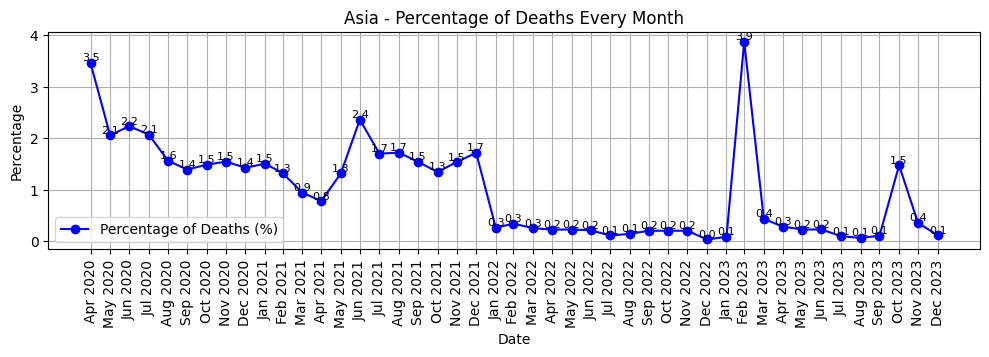

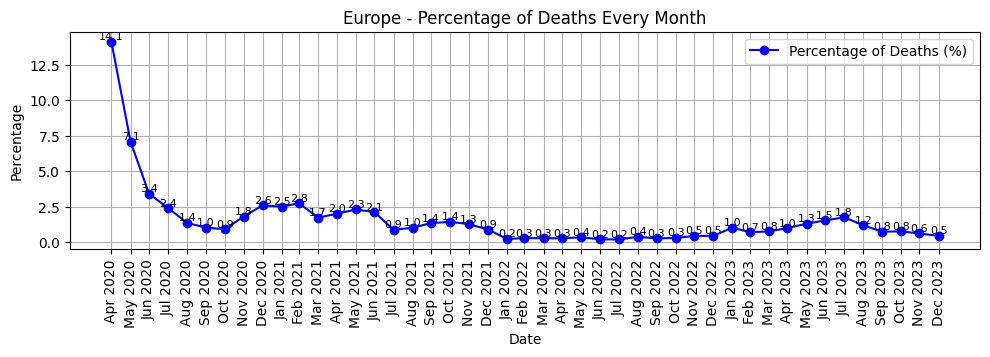

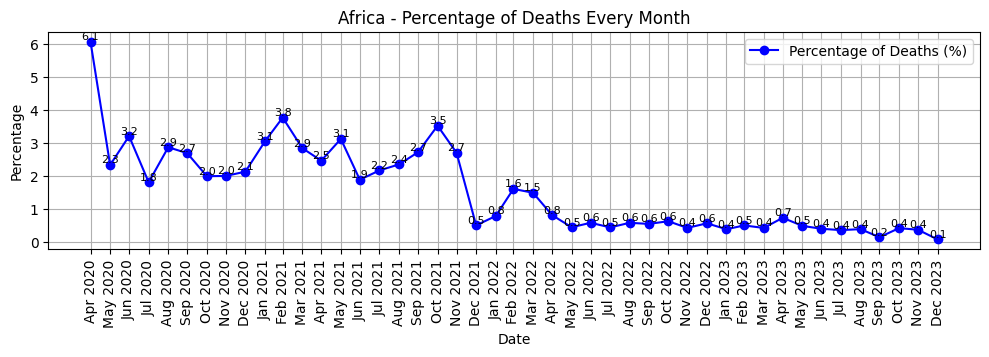

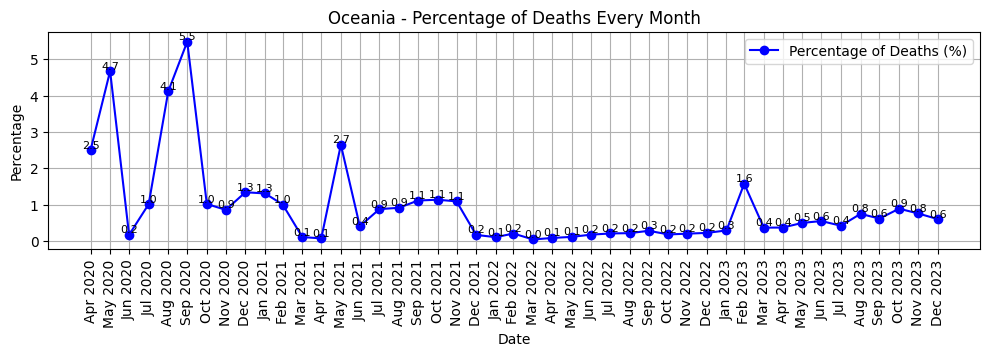

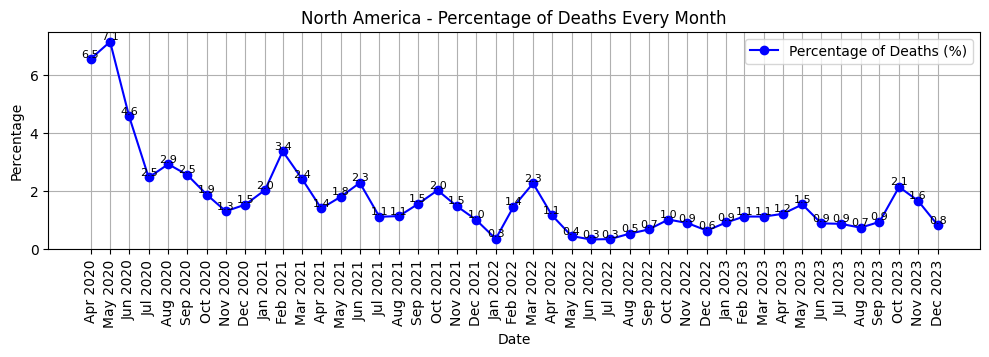

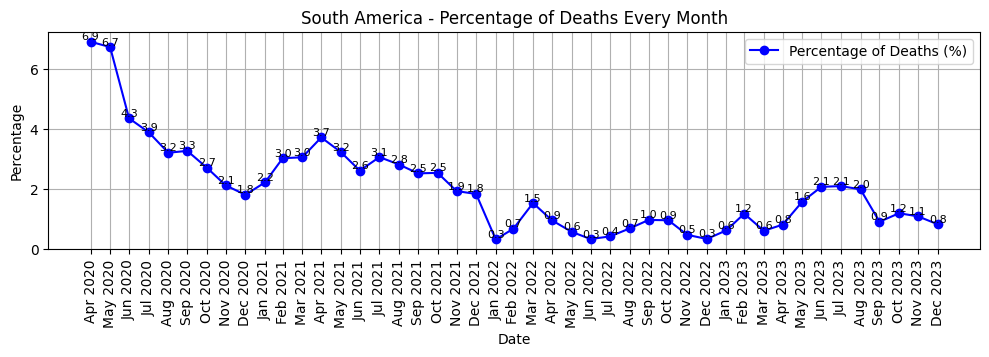

In [56]:
for continent in continents:
    percentage_deaths = (grouped_df.loc[continent]['new_deaths'] / grouped_df.loc[continent]['new_cases']) * 100
    # Plot total deaths with logarithmic scaling
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 2)
    plt.plot(grouped_df.loc[continent].index, percentage_deaths, label='Percentage of Deaths (%)', marker='o', color='blue')
    plt.title(f'{continent} - Percentage of Deaths Every Month')
    plt.xlabel('Date')
    plt.xticks(grouped_df.loc[continent].index, grouped_df.loc[continent].index.strftime('%b %Y'), rotation=90)
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)

    # Display percentage values on each data point
    for i, value in enumerate(percentage_deaths):
        plt.text(grouped_df.loc[continent].index[i], value, f'{value:.1f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.tight_layout()
    plt.show()

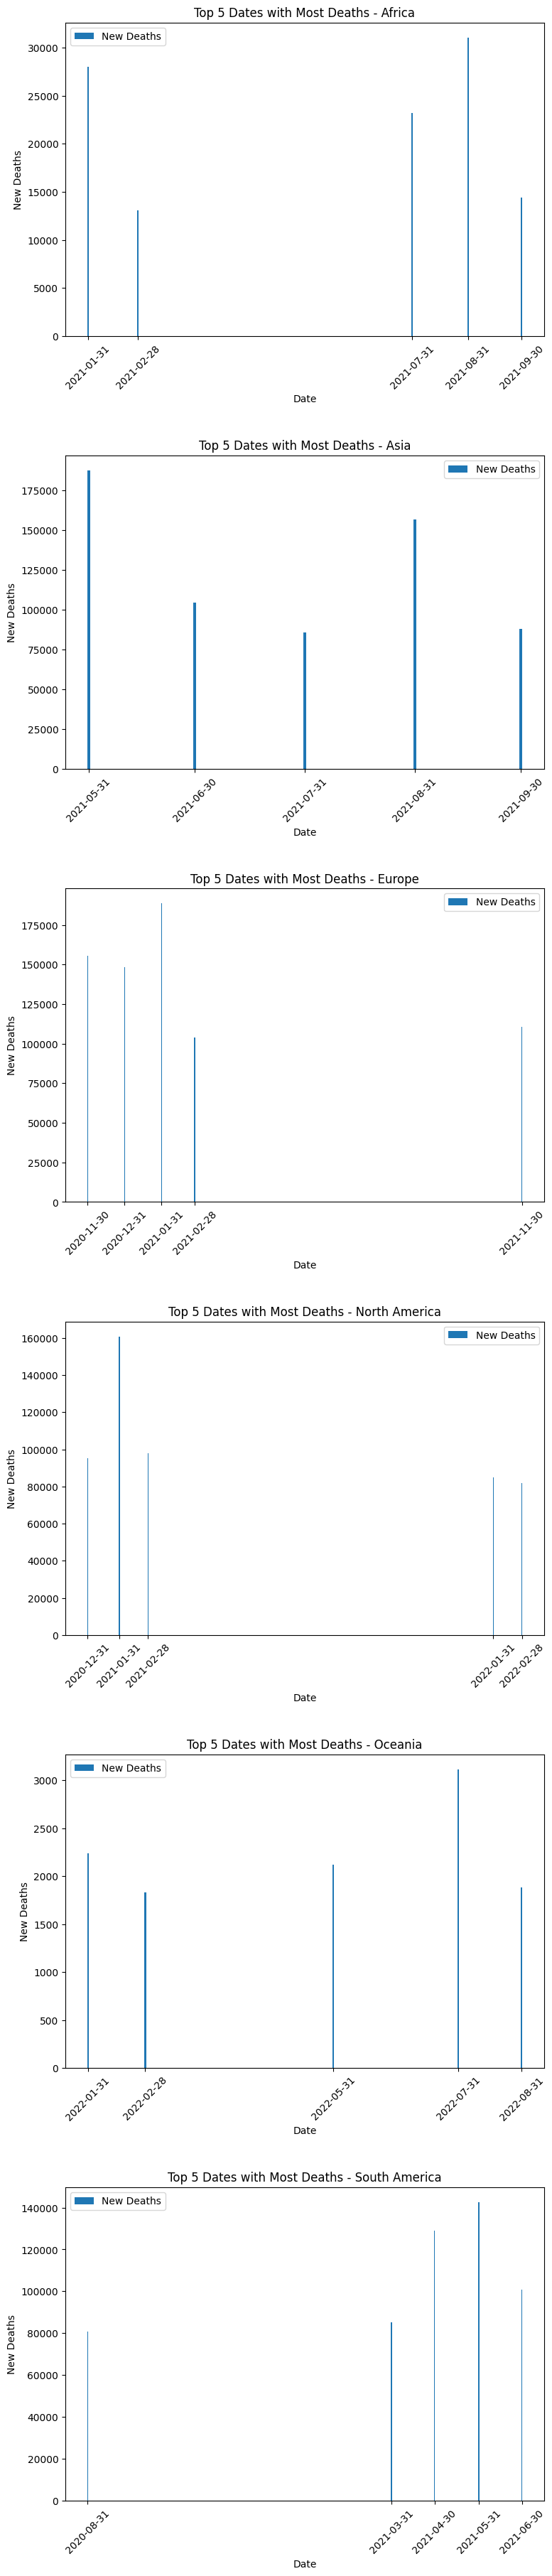

In [58]:
# Group by continent and resample the data every 3 months, summing only 'new_cases' and 'new_deaths'
grouped_df = owid_data_df_cleaned.groupby('continent').resample('M').agg({'new_cases': 'sum', 'new_deaths': 'sum'})
top5_deaths_per_continent = grouped_df.groupby('continent').apply(lambda x: x.nlargest(5, 'new_deaths'))

# Plotting
# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(owid_data_df_cleaned['continent'].unique()), ncols=1, figsize=(8, 6 * len(owid_data_df_cleaned['continent'].unique())))
fig.tight_layout(pad=3.0, h_pad=10)

# Iterate over each continent and plot the top five dates with the most deaths
for i, (continent, data) in enumerate(top5_deaths_per_continent.groupby('continent')):
    axes[i].bar(data.index.get_level_values('date'), data['new_deaths'], label='New Deaths')
    axes[i].set_xticks(data.index.get_level_values('date'))
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    # Set titles and labels
    axes[i].set_title(f'Top 5 Dates with Most Deaths - {continent}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('New Deaths')
    axes[i].legend()

plt.show()